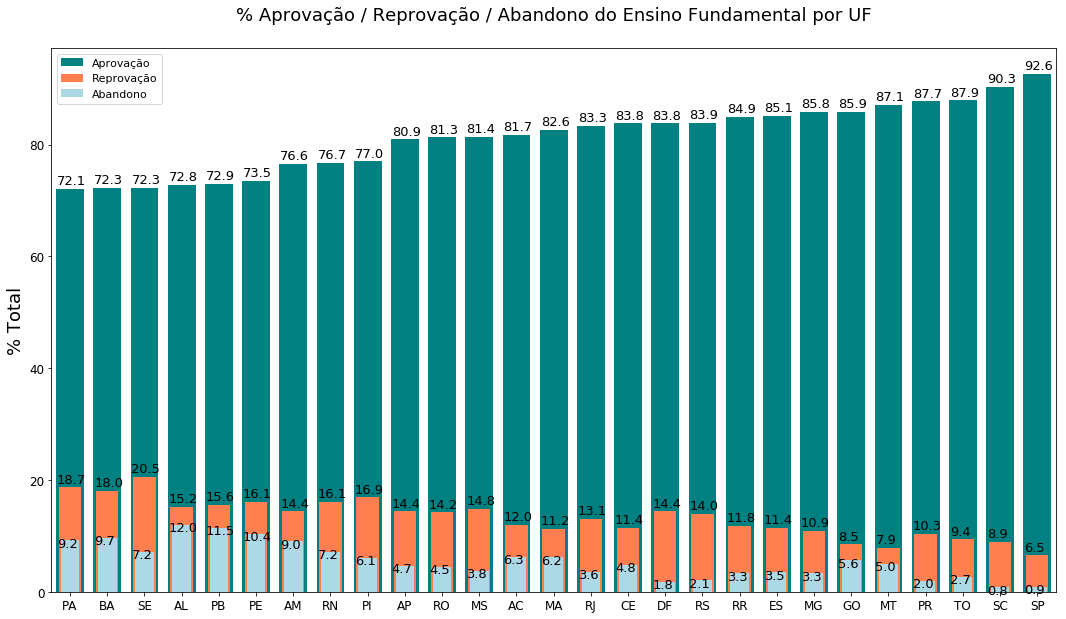

In [3]:
# Importar as bibliotecas a serem usadas
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline


# Leitura dos datasets de treino e teste e criação do df de resposta
df1 = pd.read_csv("TAXAS RENDIMENTO UF 2007.csv", sep=";",encoding='latin-1' )
df2 = pd.read_csv("TAXAS RENDIMENTO UF 2008.csv", sep=";",encoding='latin-1' )
df3 = pd.read_csv("TAXAS RENDIMENTO UF 2009.csv", sep=";",encoding='latin-1' )
df4 = pd.read_csv("TAXAS RENDIMENTO UF 2010.csv", sep=";",encoding='latin-1' )


# Concatenando os datasets
data = pd.concat([df1, df2,df3,df4],sort=False)


# Adicionando as regiões por estado
x=[]
for uf in data['UF']:
    
    if uf == 'RO' or uf == 'AC' or uf ==  'AM' or uf == 'RR' or uf == 'PA' or uf == 'AP' or uf == 'TO' :
        x.append("Norte")
        
    elif uf == 'PR' or uf =='SC' or uf == 'RS':
        x.append("Sul")
        
    elif uf == 'MS' or uf =='MT' or uf == 'GO' or uf == 'DF': 
        x.append("Centro_Oeste")    
        
    else:
        x.append("Nordeste") 
        
data['Região'] = x
df = data[(data['Localização'] == "Total") & (data['Rede']== "Total")  & (data['Ano']==2007)].sort_values('Total Aprovação Fundamental')
df_medio = data[(data['Localização'] == "Total") & (data['Rede']== "Total")  & (data['Ano']==2007)].sort_values('Total  Aprovação Médio')


# Definindo as features dos graficos
features = [ 
'Ano',
'UF',
    
'Total Aprovação Fundamental',
'Total Reprovação Fundamental',
    
'Total  Aprovação Médio',
'Total  Reprovação Médio',
    
'Total Abandono Fundamental',
'Total Abandono - Médio'
]

#-----------------------------------------------------
# Criando os graficos
#-----------------------------------------------------
ax = df['Total Aprovação Fundamental'].str.replace(',', '.').astype(float).plot(kind='bar', figsize=(18,10),color="teal", fontsize=12, width=0.75);
ax = df['Total Reprovação Fundamental'].str.replace(',', '.').astype(float).plot(kind='bar', figsize=(18,10),color="coral", fontsize=12, width=0.6);
ax = df['Total Abandono Fundamental'].str.replace(',', '.').astype(float).plot(kind='bar', figsize=(18,10),color="lightblue", fontsize=12, width=0.5);

aprovacao_fundamental=[]
for x in  df['Total Aprovação Fundamental'].str.replace(',', '.').astype(float):
    aprovacao_fundamental.append(x)

reprovacao_fundamental=[]
for x in  df['Total Reprovação Fundamental'].str.replace(',', '.').astype(float):
    reprovacao_fundamental.append(x)
    
abandono_fundamental=[]
for x in  df['Total Abandono Fundamental'].str.replace(',', '.').astype(float):
    abandono_fundamental.append(x)
    

ax.set_title("% Aprovação / Reprovação / Abandono do Ensino Fundamental por UF", fontsize=18, y=1.04)
ax.set_ylabel("% Total", fontsize=18);
ax.set_xticklabels(df['UF'],rotation='horizontal')
ax.legend(labels=['Aprovação','Reprovação','Abandono'], loc='upper left',fontsize=11)


# Atribuindo labels
for apr_fun,rep_fun,aba_fun,tam in zip(aprovacao_fundamental,reprovacao_fundamental,abandono_fundamental, range(0,27)):
    ax.text(x =tam+ -0.35, 
            y = apr_fun+0.8,
            s= apr_fun,
            fontsize=13)

    ax.text(x =tam+ -0.35, 
            y = rep_fun+0.8,
            s=rep_fun,
            fontsize=13)

    ax.text(x =tam+ -0.35, 
            y = aba_fun-1.21,
            s=aba_fun,
            fontsize=13)

# Salvando arquivo     
plt.savefig('C:\\Users\\WYWE\\Desktop\\Jupyter\\Data Science - Desafio\\ensino_fundamental_.png', dpi=300, transparent=False)

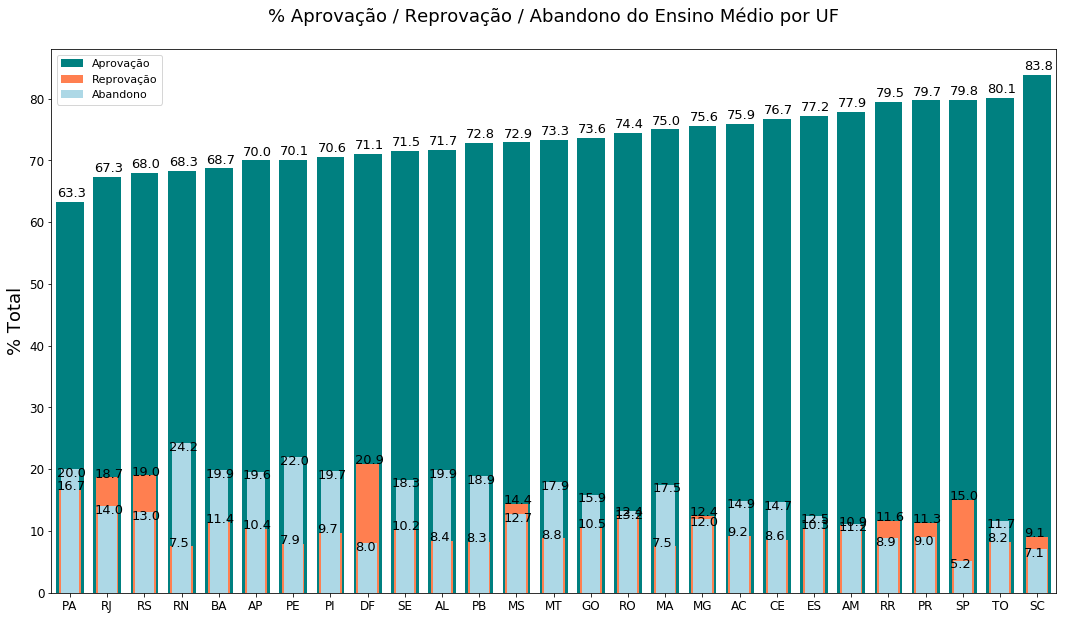

In [4]:

ax = df_medio['Total  Aprovação Médio'].str.replace(',', '.').astype(float).plot(kind='bar', figsize=(18,10),color="teal", fontsize=12, width=0.75);
ax = df_medio['Total  Reprovação Médio'].str.replace(',', '.').astype(float).plot(kind='bar', figsize=(18,10),color="coral", fontsize=12, width=0.6);
ax = df_medio['Total Abandono - Médio'].str.replace(',', '.').astype(float).plot(kind='bar', figsize=(18,10),color="lightblue", fontsize=12, width=0.5);

aprovacao_medio=[]
for x_apr in  df_medio['Total  Aprovação Médio'].str.replace(',', '.').astype(float):
    aprovacao_medio.append(x_apr)

reprovacao_medio=[]
for x_rep in  df_medio['Total  Reprovação Médio'].str.replace(',', '.').astype(float):
    reprovacao_medio.append(x_rep)
    
abandono_medio=[]
for x_aba in  df_medio['Total Abandono - Médio'].str.replace(',', '.').astype(float):
    abandono_medio.append(x_aba)
    

ax.set_title("% Aprovação / Reprovação / Abandono do Ensino Médio por UF", fontsize=18, y=1.04)
ax.set_ylabel("% Total", fontsize=18);
ax.set_xticklabels(df_medio['UF'],rotation='horizontal')
ax.legend(labels=['Aprovação','Reprovação','Abandono'], loc='upper left',fontsize=11)



# Atribuindo labels
for apr_med,rep_med,aba_med,tam in zip(aprovacao_medio,reprovacao_medio,abandono_medio, range(0,27)):
    ax.text(x =tam+ -0.35, 
            y = apr_med+0.8,
            s= apr_med,
            fontsize=13)

    ax.text(x =tam+ -0.35, 
            y = rep_med+0.0,
            s=rep_med,
            fontsize=13
           )

    ax.text(x =tam+ -0.35, 
            y = aba_med-1.21,
            s=aba_med,
            fontsize=13)

    
# Salvando arquivo    
plt.savefig('C:\\Users\\WYWE\\Desktop\\Jupyter\\Data Science - Desafio\\ensino_medio_.png', dpi=300, transparent=False)